# Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score #classification metrics
import sklearn.linear_model, sklearn.datasets
import seaborn as sns #for heatmap and boxplot
from sklearn.svm import SVC #support vector machines model
from sklearn.preprocessing import PolynomialFeatures  # For adding polynomial features
from sklearn.preprocessing import OneHotEncoder  # For one-hot encoding categorical variables
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn import tree  # Additional functions for Decision Trees
from sklearn.metrics import mean_squared_error, r2_score  # Regression evaluation metrics
import graphviz  # To visualize Decision Trees
from sklearn.linear_model import Ridge  # For Polynomial Regression
from sklearn.linear_model import LogisticRegression  # For Logistic Regression






# Data Exploration

In [4]:
metal_parts_data = pd.read_csv('metal_parts_dataset.csv')

# Attributes of dataset

print('Shape of the data (rows and columns):')
print(metal_parts_data.shape)
print()
print('List of the column names:')
print(metal_parts_data.columns)
print()
print('The data type of all the columns:')
print(metal_parts_data.dtypes)

Shape of the data (rows and columns):
(1000, 16)

List of the column names:
Index(['Lifespan', 'partType', 'microstructure', 'coolingRate', 'quenchTime',
       'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%',
       'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects',
       'seedLocation', 'castType'],
      dtype='object')

The data type of all the columns:
Lifespan          float64
partType           object
microstructure     object
coolingRate         int64
quenchTime        float64
forgeTime         float64
HeatTreatTime     float64
Nickel%           float64
Iron%             float64
Cobalt%           float64
Chromium%         float64
smallDefects        int64
largeDefects        int64
sliverDefects       int64
seedLocation       object
castType           object
dtype: object


In [5]:
#Displaying and understanding dataset
display(metal_parts_data)
print(metal_parts_data.head(20))
print(metal_parts_data.sample(10))

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1469.17,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die
1,1793.64,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment
2,700.60,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment
3,1082.10,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous
4,1838.83,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1217.50,Block,singleGrain,5,1.91,8.55,34.76,68.11,20.73,7.15,4.01,0,0,0,Bottom,Investment
996,742.05,Block,singleGrain,10,0.67,7.99,46.21,51.25,32.12,12.23,4.40,1,0,0,Bottom,Investment
997,1448.26,Nozzle,equiGrain,17,3.12,7.61,59.87,54.09,33.20,9.31,3.40,16,1,0,Bottom,Investment
998,1099.10,Valve,colGrain,23,4.48,2.39,17.72,50.32,31.92,13.01,4.75,11,0,0,Top,Continuous


    Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0    1469.17   Nozzle      equiGrain           13        3.84       6.47   
1    1793.64    Block    singleGrain           19        2.62       3.48   
2     700.60    Blade      equiGrain           28        0.76       1.34   
3    1082.10   Nozzle       colGrain            9        2.01       2.19   
4    1838.83    Blade       colGrain           16        4.13       3.87   
5     660.62    Valve       colGrain           28        4.45       3.82   
6    1835.46    Block      equiGrain           19        2.76       4.27   
7    1522.80    Block      equiGrain           16        1.48       9.61   
8    1347.72    Blade      equiGrain           21        1.41       4.17   
9     985.79    Valve       colGrain           10        3.75       6.82   
10   1798.12    Block       colGrain           17        1.50       2.99   
11   1613.94    Block       colGrain           25        0.78       2.21   
12    876.87

In [6]:
metal_parts_data.describe()

,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1298.556320,17.639000,2.764230,5.464600,30.194510,60.243080,24.553580,12.434690,2.768650,17.311000,0.550000,0.292000
std,340.071434,7.491783,1.316979,2.604513,16.889415,5.790475,7.371737,4.333197,1.326496,12.268365,1.163982,1.199239
min,417.990000,5.000000,0.500000,1.030000,1.030000,50.020000,6.660000,5.020000,0.510000,0.000000,0.000000,0.000000
25%,1047.257500,11.000000,1.640000,3.170000,16.185000,55.287500,19.387500,8.597500,1.590000,7.000000,0.000000,0.000000
50%,1266.040000,18.000000,2.755000,5.475000,29.365000,60.615000,24.690000,12.585000,2.865000,18.000000,0.000000,0.000000
75%,1563.050000,24.000000,3.970000,7.740000,44.955000,65.220000,29.882500,16.080000,3.922500,26.000000,0.000000,0.000000
max,2134.530000,30.000000,4.990000,10.000000,59.910000,69.950000,43.650000,19.990000,4.990000,61.000000,4.000000,8.000000


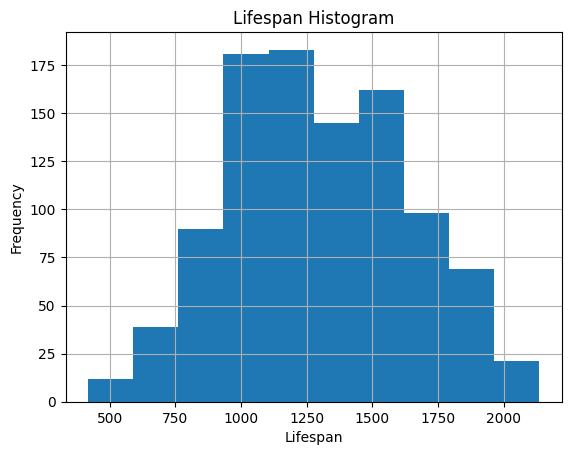

In [7]:
metal_parts_data["Lifespan"].hist()
plt.xlabel("Lifespan")
plt.ylabel("Frequency")
plt.title("Lifespan Histogram")
plt.show()

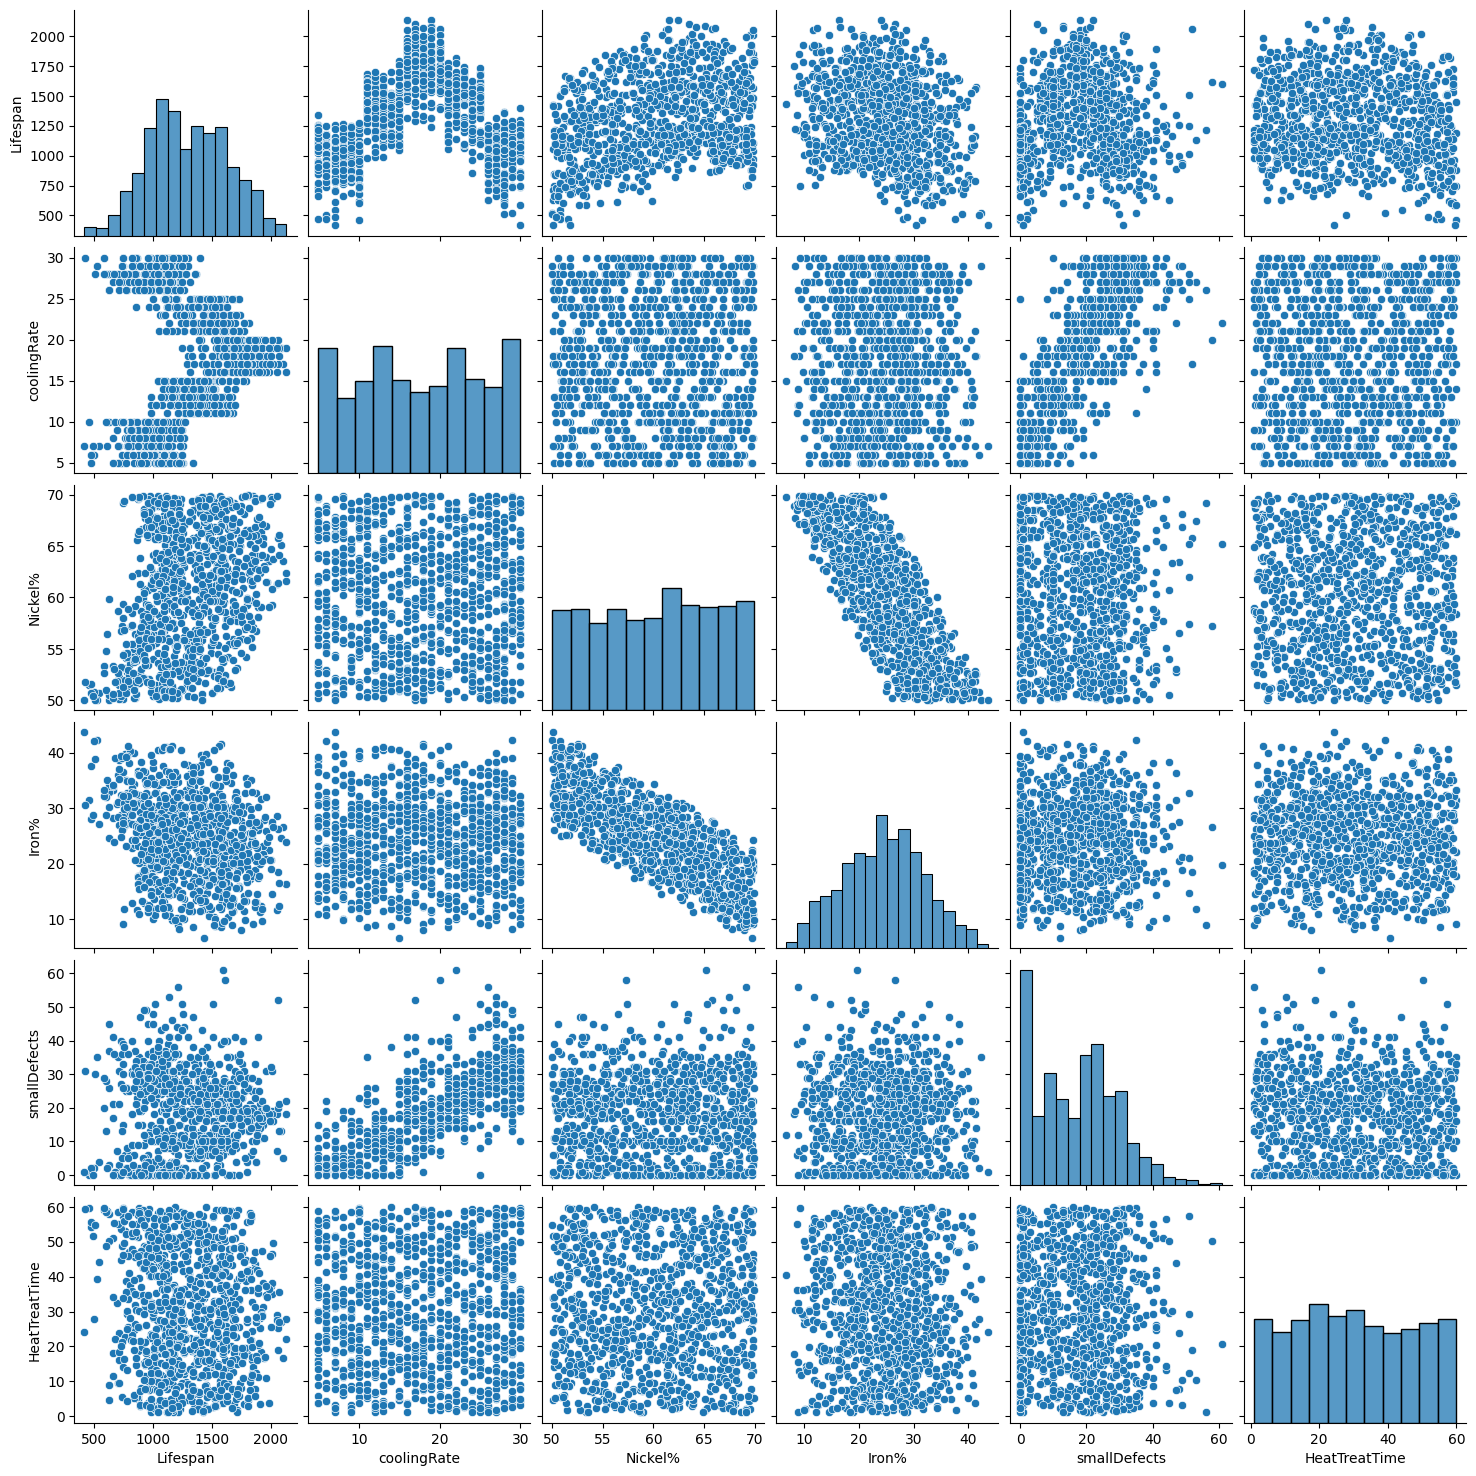

In [8]:


#Selecting features for sns and plotting
selected_features = ['Lifespan', 'coolingRate', 'Nickel%', 'Iron%', 'smallDefects', 'HeatTreatTime']
data_subset = metal_parts_data[selected_features]
sns.pairplot(data_subset)
plt.show()


In [9]:
# Selecting categorical columns and create a copy of the dataset
metal_parts_data_OHE = metal_parts_data.copy()

# OneHotEncoder
one_hot_encoder = OneHotEncoder()
categorical_columns = ['partType', 'microstructure', 'seedLocation', 'castType']

# Encoding the categorical columns
for col in categorical_columns:
    encoded = one_hot_encoder.fit_transform(metal_parts_data_OHE[[col]]).toarray()
    # Adding the encoded columns to the dataframe
    for i, category in enumerate(one_hot_encoder.categories_[0]):
        metal_parts_data_OHE[f"{col}_{category}"] = encoded[:, i]
   # Removing the original categorical column
    metal_parts_data_OHE.drop(columns=[col], inplace=True)
# Checking
display(metal_parts_data_OHE)

,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,...,partType_Nozzle,partType_Valve,microstructure_colGrain,microstructure_equiGrain,microstructure_singleGrain,seedLocation_Bottom,seedLocation_Top,castType_Continuous,castType_Die,castType_Investment
0,1469.17,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1793.64,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,700.60,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1082.10,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1838.83,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1217.50,5,1.91,8.55,34.76,68.11,20.73,7.15,4.01,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
996,742.05,10,0.67,7.99,46.21,51.25,32.12,12.23,4.40,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
997,1448.26,17,3.12,7.61,59.87,54.09,33.20,9.31,3.40,16,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
998,1099.10,23,4.48,2.39,17.72,50.32,31.92,13.01,4.75,11,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Heatmap

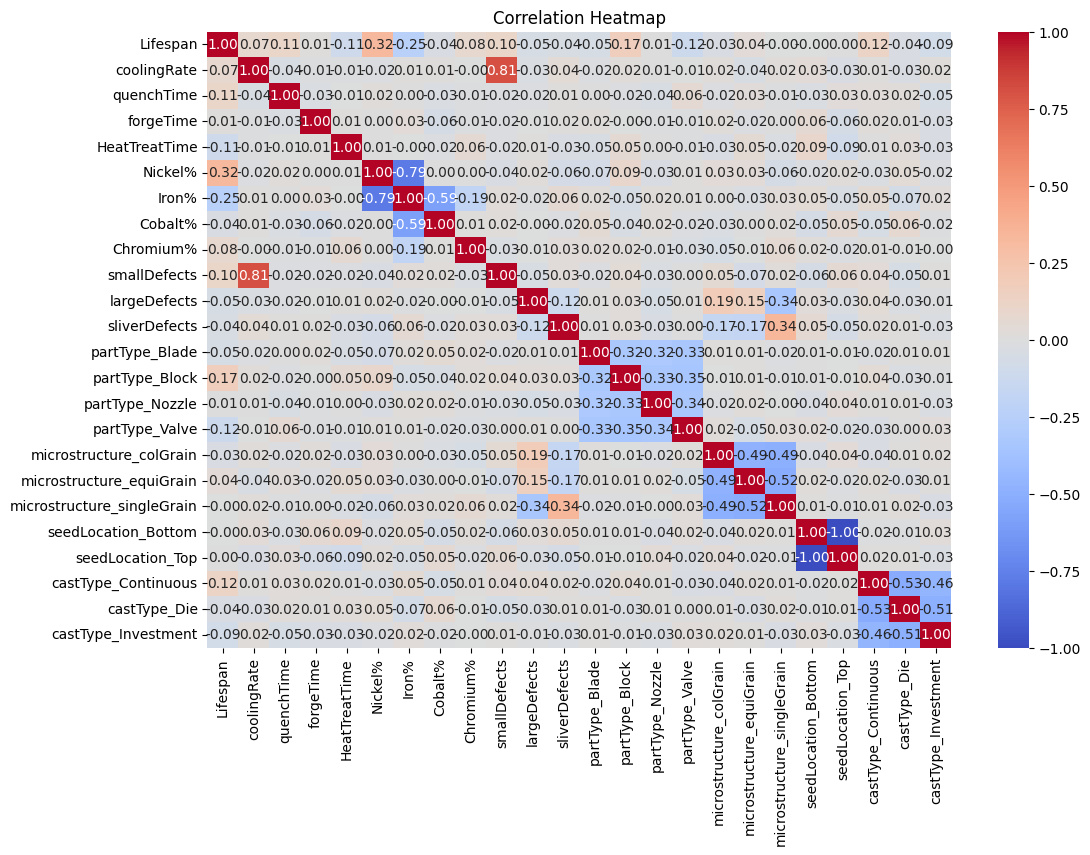

In [10]:
# Selecting columns
numeric_data = metal_parts_data_OHE.select_dtypes(include=['float64', 'int64'])
# Creating the correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



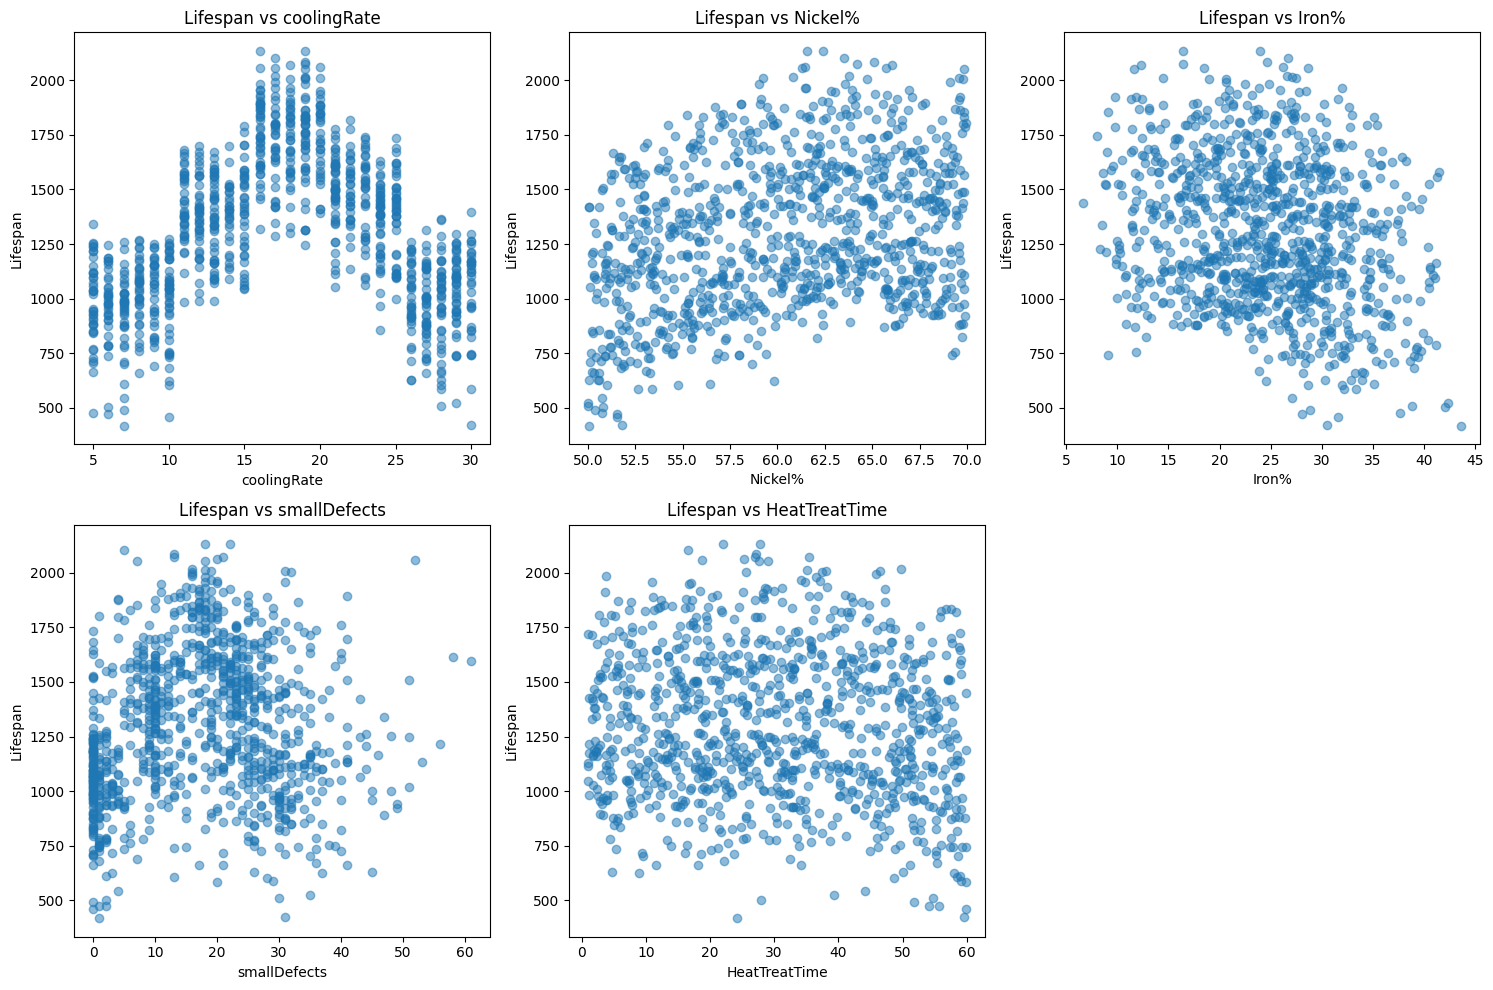

In [11]:
features = ['coolingRate', 'Nickel%', 'Iron%', 'smallDefects', 'HeatTreatTime']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(metal_parts_data[feature], metal_parts_data['Lifespan'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Lifespan')
    plt.title(f'Lifespan vs {feature}')
plt.tight_layout()
plt.show()


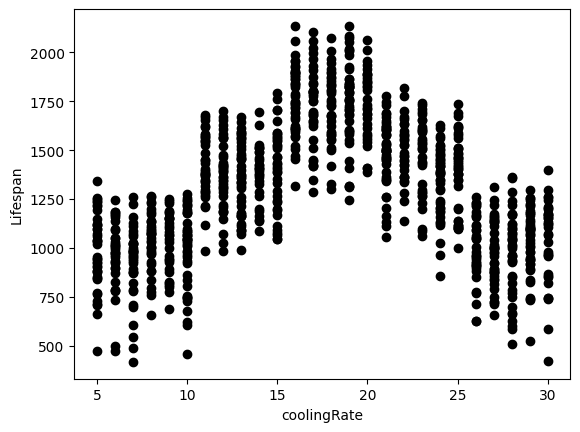

In [12]:
X = metal_parts_data['coolingRate']
y = metal_parts_data['Lifespan']
plt.scatter(X, y,  color='black', label='y')
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.show()

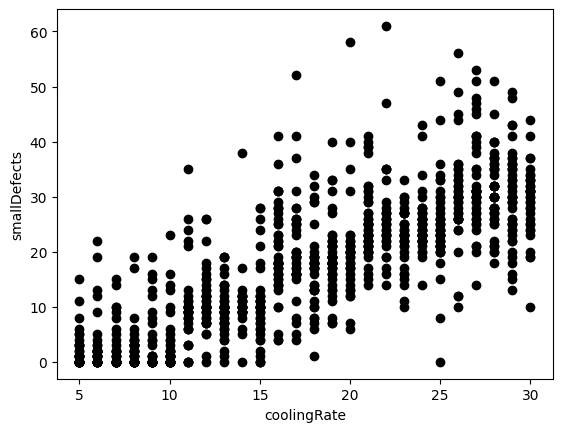

In [13]:
X = metal_parts_data['coolingRate']
y = metal_parts_data['smallDefects']
plt.scatter(X, y,  color='black', label='y')
plt.xlabel('coolingRate')
plt.ylabel('smallDefects')
plt.show()

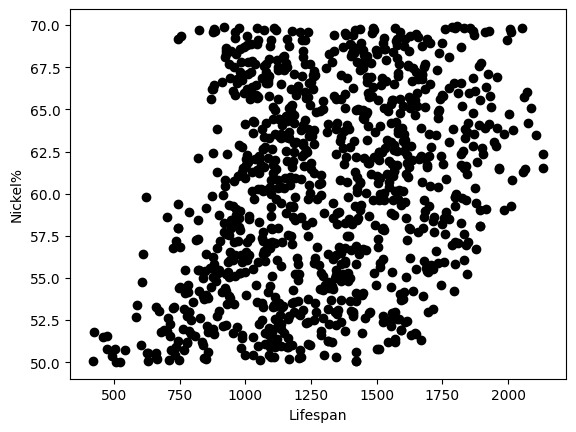

In [14]:
X = metal_parts_data['Lifespan']
y = metal_parts_data['Nickel%']
plt.scatter(X, y,  color='black', label='y')
plt.xlabel('Lifespan')
plt.ylabel('Nickel%')
plt.show()

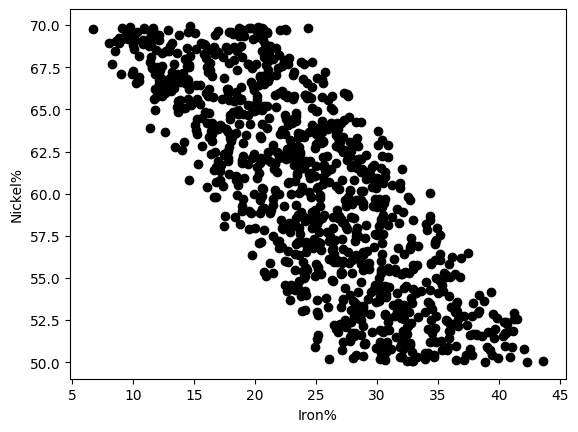

In [15]:
X = metal_parts_data['Iron%']
y = metal_parts_data['Nickel%']
plt.scatter(X, y,  color='black', label='y')
plt.xlabel('Iron%')
plt.ylabel('Nickel%')
plt.show()

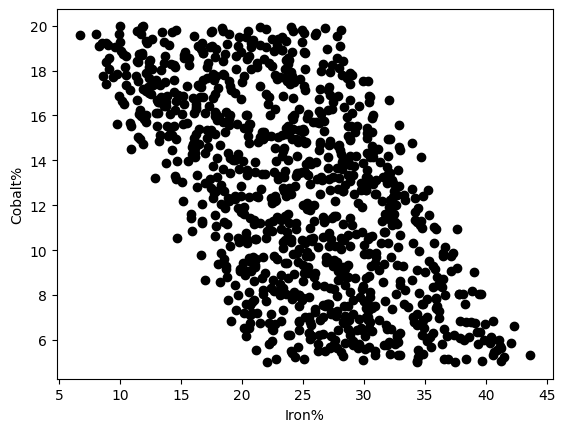

In [16]:
X = metal_parts_data['Iron%']
y = metal_parts_data['Cobalt%']
plt.scatter(X, y,  color='black', label='y')
plt.xlabel('Iron%')
plt.ylabel('Cobalt%')
plt.show()

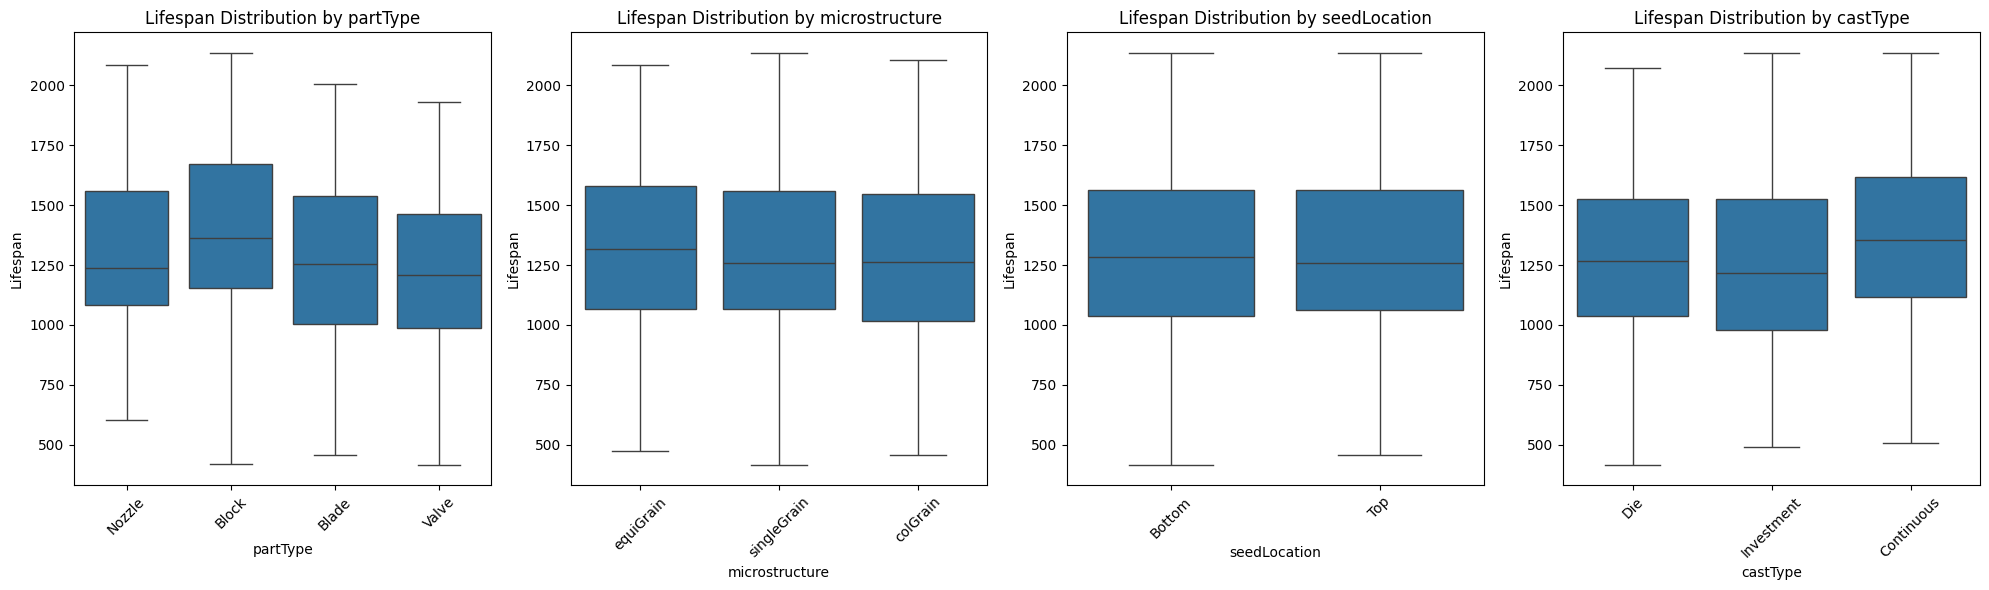

In [17]:

categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(20, 6))

# Boxplot for each categorical columns
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=metal_parts_data[feature], y=metal_parts_data['Lifespan'], ax=axes[i])
    axes[i].set_title(f'Lifespan Distribution by {feature}')
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()



In [18]:
# Creating the target variable by classifying lifespan based on the 1500-hour threshold
X = metal_parts_data.drop(columns=['Lifespan'])
y = (metal_parts_data['Lifespan'] >= 1500).astype(int)  # 1500 saat eşiğine göre sınıflandırma

# Combining X and y to create a complete dataframe
data_with_labels = pd.concat([X, y.rename("target")], axis=1)
display(data_with_labels)

# Checking
categoryCounts = data_with_labels['target'].value_counts()
print('Category label counts:')
print(categoryCounts)

,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType,target
0,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die,0
1,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment,1
2,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment,0
3,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous,0
4,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Block,singleGrain,5,1.91,8.55,34.76,68.11,20.73,7.15,4.01,0,0,0,Bottom,Investment,0
996,Block,singleGrain,10,0.67,7.99,46.21,51.25,32.12,12.23,4.40,1,0,0,Bottom,Investment,0
997,Nozzle,equiGrain,17,3.12,7.61,59.87,54.09,33.20,9.31,3.40,16,1,0,Bottom,Investment,0
998,Valve,colGrain,23,4.48,2.39,17.72,50.32,31.92,13.01,4.75,11,0,0,Top,Continuous,0


Category label counts:
target
0    694
1    306
Name: count, dtype: int64


In [19]:
# Creating 'Lifespan_Label' based on the 1500-hour threshold
metal_parts_data_OHE['Lifespan_Label'] = (metal_parts_data_OHE['Lifespan'] >= 1500).astype(int)


# Decision tree

Decision Tree Regression Results:
Mean squared error (Training set): 12623.9686
R2 score (Training set): 0.8896
Mean squared error (Test set): 14973.6481
R2 score (Test set): 0.8752


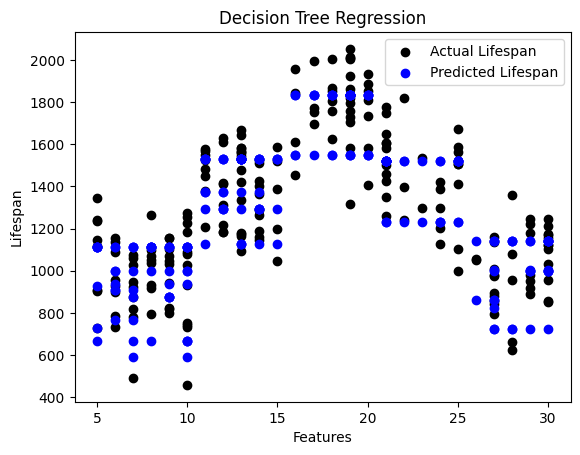

In [20]:
#Tutorial 5
# Define the features for prediction, adding only partType and castType one-hot encoded columns
features = ['coolingRate', 'Nickel%', 'Iron%', 'smallDefects', 'HeatTreatTime',
            'partType_Blade', 'partType_Block', 'partType_Nozzle', 'partType_Valve',
            'castType_Die', 'castType_Investment', 'castType_Continuous']
target = 'Lifespan'

# Separate features (X) and target variable (y)
X = metal_parts_data_OHE[features].values
y = metal_parts_data_OHE[target].values

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Create Decision Tree Regressor object with hyperparameters
tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=0)

# Train the model using the training sets
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_test = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

# Evaluate model performance on training and test sets
print("Decision Tree Regression Results:")
print('Mean squared error (Training set): {:.4f}'.format(mean_squared_error(y_train, y_pred_train)))
print('R2 score (Training set): {:.4f}'.format(r2_score(y_train, y_pred_train)))
print('Mean squared error (Test set): {:.4f}'.format(mean_squared_error(y_test, y_pred_test)))
print('R2 score (Test set): {:.4f}'.format(r2_score(y_test, y_pred_test)))

# Plot outputs
plt.scatter(X_test[:, 0], y_test, color='black', label='Actual Lifespan')
plt.scatter(X_test[:, 0], y_pred_test, color='blue', label='Predicted Lifespan')
plt.xlabel('Features')
plt.ylabel('Lifespan')
plt.legend()
plt.title("Decision Tree Regression")
plt.show()



# Polynominal Regression

Mean squared error loss (Training set): 22362.4395
R2 score (Training set): 0.8113
Mean squared error loss (Test set): 24554.0354
R2 score (Test set): 0.7629


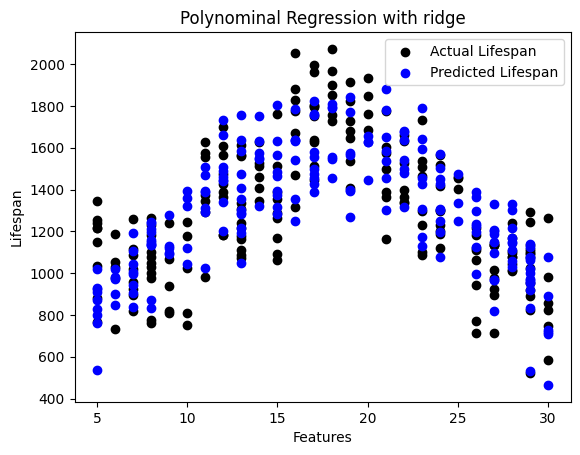

In [21]:
#Tutorial 3-4
# Define the features and target variable
features = ['coolingRate', 'Nickel%', 'Iron%', 'smallDefects', 'HeatTreatTime',
            'partType_Blade', 'partType_Block', 'partType_Nozzle', 'partType_Valve',
            'castType_Die', 'castType_Investment', 'castType_Continuous']
target = 'Lifespan'

X_raw = np.array(metal_parts_data_OHE[features].values)
y_raw = np.array(metal_parts_data_OHE[target].values)

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.20, random_state=42)

# Defining the degree of the polynomial features
degree = 2
poly = PolynomialFeatures(degree)

# Transforming the training and test data to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge regression with polynomial features (to reduce overfitting)
alpha = 1.0
reg = Ridge(alpha=alpha)
reg.fit(X_train_poly, y_train)


y_pred_train = reg.predict(X_train_poly)
y_pred_test = reg.predict(X_test_poly)

# Evaluate model performance on the training set and test
print('Mean squared error loss (Training set): {:.4f}'.format(mean_squared_error(y_train, y_pred_train)))
print('R2 score (Training set): {:.4f}'.format(r2_score(y_train, y_pred_train)))
print('Mean squared error loss (Test set): {:.4f}'.format(mean_squared_error(y_test, y_pred_test)))
print('R2 score (Test set): {:.4f}'.format(r2_score(y_test, y_pred_test)))

# Visualize
plt.scatter(X_test[:, 0], y_test, color='black', label='Actual Lifespan')
plt.scatter(X_test[:, 0], y_pred_test, color='blue', label='Predicted Lifespan')
plt.xlabel('Features')
plt.ylabel('Lifespan')
plt.legend()
plt.title("Polynominal Regression with ridge")
plt.show()


# Logistic Regression

C: 0.0000, Validation F1 Score: 0.0000
C: 0.0000, Validation F1 Score: 0.0000
C: 0.0000, Validation F1 Score: 0.0000
C: 0.0000, Validation F1 Score: 0.0000
C: 0.0000, Validation F1 Score: 0.0000
C: 0.0000, Validation F1 Score: 0.0000
C: 0.0001, Validation F1 Score: 0.0000
C: 0.0010, Validation F1 Score: 0.0000
C: 0.0100, Validation F1 Score: 0.0000
C: 0.1000, Validation F1 Score: 0.1558
C: 1.0000, Validation F1 Score: 0.1538
C: 10.0000, Validation F1 Score: 0.1538
C: 100.0000, Validation F1 Score: 0.1538
C: 1000.0000, Validation F1 Score: 0.1772
C: 10000.0000, Validation F1 Score: 0.1772
C: 100000.0000, Validation F1 Score: 0.1772
C: 1000000.0000, Validation F1 Score: 0.1772
C: 10000000.0000, Validation F1 Score: 0.1772
C: 100000000.0000, Validation F1 Score: 0.1772
C: 1000000000.0000, Validation F1 Score: 0.1772

Best C: 1000.0

Test Set Metrics:
Accuracy: 0.7250
Precision: 0.7222
Recall: 0.2063
F1 Score: 0.3210

Classification Report:
               precision    recall  f1-score   su

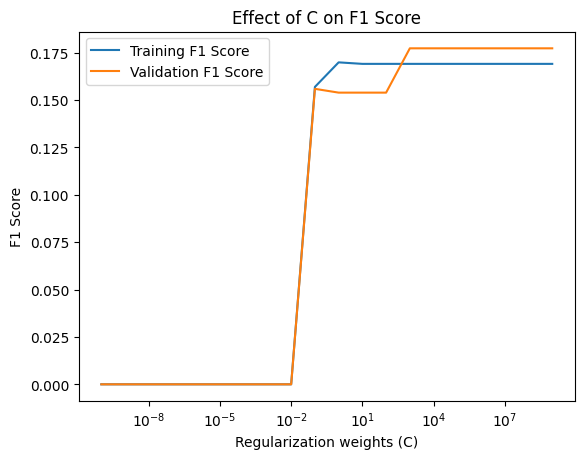

In [22]:
#Tutorial 5
# Update the features list by adding the columns that were already one-hot encoded
features = ['coolingRate', 'Nickel%', 'partType_Blade', 'partType_Block', 'partType_Nozzle', 'partType_Valve',
            'castType_Die', 'castType_Investment', 'castType_Continuous']
target = 'Lifespan_Label'

# Separate the features (X) and target variable (y)
X = metal_parts_data_OHE[features].values
y = metal_parts_data_OHE[target].values

# Split the data into training, validation, and test sets
X_non_test, X_test, y_non_test, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=0.25, shuffle=True, random_state=0)

# Create empty arrays for C parameters and F1 scores
C_indices = np.arange(20)  # Testing 20 different values
Cs = 10.0 ** (C_indices - 10)
f1_train_array = np.full(len(Cs), np.nan)
f1_valid_array = np.full(len(Cs), np.nan)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Loop to find the best C value
for C_index, C in zip(C_indices, Cs):
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)

    # Calculate F1 scores for training and validation sets
    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_valid)
    f1_train_array[C_index] = f1_score(y_train, y_pred_train)
    f1_valid_array[C_index] = f1_score(y_valid, y_pred_valid)
    print(f'C: {C:.4f}, Validation F1 Score: {f1_valid_array[C_index]:.4f}')

# Find the best C value
best_c_index = np.nanargmax(f1_valid_array)
best_C = Cs[best_c_index]
print(f'\nBest C: {best_C}')

# Retrain the model with the best C and evaluate it on the test set
model = LogisticRegression(C=best_C)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

# Evaluate the model's performance on the test set
print('\nTest Set Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_test):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_test):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_test):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_test):.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_test))

# Plot the graph of C values and F1 scores
plt.plot(Cs, f1_train_array, label='Training F1 Score')
plt.plot(Cs, f1_valid_array, label='Validation F1 Score')
plt.xscale('log')
plt.xlabel('Regularization weights (C)')
plt.ylabel('F1 Score')
plt.title('Effect of C on F1 Score')
plt.legend()
plt.show()




Accuracy: 0.7250
Precision: 0.7222
Recall: 0.2063
F1 Score: 0.3210
Balanced Accuracy: 0.5849
Macro averaged F1 Score: 0.3210
Weighted averaged F1 Score: 0.3210

Confusion matrix: 
 [[0.66  0.025]
 [0.25  0.065]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       137
           1       0.72      0.21      0.32        63

    accuracy                           0.72       200
   macro avg       0.72      0.58      0.57       200
weighted avg       0.72      0.72      0.67       200



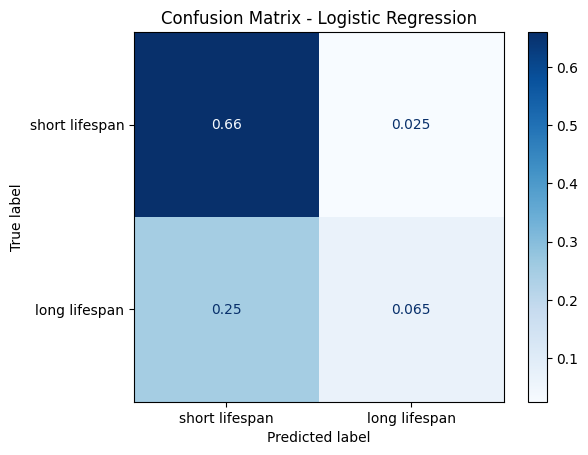

In [23]:
# Tutorial 5
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_test)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='all')
print(f'\nConfusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['short lifespan', 'long lifespan']).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
# The classification report
print(f'\nClassification Report:')
print(sklearn.metrics.classification_report(y_test, y_pred_test))

# Support Vector Machines

In [ ]:
#Tutorial 5
# Define the features and target variable
features = ['coolingRate', 'Nickel%', 'partType_Blade', 'partType_Block', 'partType_Nozzle', 'partType_Valve',
            'castType_Die', 'castType_Investment', 'castType_Continuous']
target = 'Lifespan_Label'

# Separate features (X) and target (y)
X = metal_parts_data_OHE[features].values
y = metal_parts_data_OHE[target].values

# Split the data into training and test sets (80% training, 20% testing)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Define a range of C values to test
C_indices = np.arange(20)  # 20 different values
Cs = 10.0 ** (C_indices - 10)  # Regularization weights (C)

# Create arrays to store F1 scores
f1_train_array = np.full(len(Cs), np.nan)
f1_valid_array = np.full(len(Cs), np.nan)

# Split training data into training and validation sets (75% training, 25% validation)
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# Loop to find the best C value
for C_index, C in zip(C_indices, Cs):
    # Create and train the model
    model = SVC(kernel='rbf', C=C)  # SVM with RBF kernel
    model.fit(X_train_split, y_train_split)

    # Evaluate F1 score on the training set
    y_pred_train = model.predict(X_train_split)
    f1_train = f1_score(y_train_split, y_pred_train)

    # Evaluate F1 score on the validation set
    y_pred_valid = model.predict(X_valid_split)
    f1_valid = f1_score(y_valid_split, y_pred_valid)

    # Store F1 scores for this iteration
    f1_train_array[C_index] = f1_train
    f1_valid_array[C_index] = f1_valid
    print(f'C: {C:.4f}, Validation F1 Score: {f1_valid:.4f}')

# Select the best C value
best_c_index = np.nanargmax(f1_valid_array)
best_C = Cs[best_c_index]
print(f'\nThe best C: {best_C:.4f}')

# Train the model with the best C value and evaluate on the test set
final_model = SVC(kernel='rbf', C=best_C)
final_model.fit(X_train, y_train)
y_pred_test = final_model.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Metrics:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_test):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_test):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_test):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_test):.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# Visualize the effect of C on F1 scores
plt.plot(Cs, f1_train_array, label='Training F1 Score')
plt.plot(Cs, f1_valid_array, label='Validation F1 Score')
plt.xscale('log')
plt.xlabel('Regularization weights (C)')
plt.ylabel('F1 Score')
plt.title('Effect of C on F1 Score (SVM)')
plt.legend()
plt.show()


C: 0.0000, Validation F1 Score: 0.0000
C: 0.0000, Validation F1 Score: 0.0000
C: 0.0000, Validation F1 Score: 0.0000
C: 0.0000, Validation F1 Score: 0.0000
C: 0.0000, Validation F1 Score: 0.0000
C: 0.0000, Validation F1 Score: 0.0000
C: 0.0001, Validation F1 Score: 0.0000
C: 0.0010, Validation F1 Score: 0.0000
C: 0.0100, Validation F1 Score: 0.0000
C: 0.1000, Validation F1 Score: 0.0000
C: 1.0000, Validation F1 Score: 0.5962
C: 10.0000, Validation F1 Score: 0.8397
C: 100.0000, Validation F1 Score: 0.8358
C: 1000.0000, Validation F1 Score: 0.7879
C: 10000.0000, Validation F1 Score: 0.7424
C: 100000.0000, Validation F1 Score: 0.7727
C: 1000000.0000, Validation F1 Score: 0.7050
C: 10000000.0000, Validation F1 Score: 0.7050


In [ ]:
#Tutorial 5
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_test)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='all')
print(f'\nConfusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['short lifespan', 'long lifespan']).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Support Vector Machines")
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(f'\nClassification Report:')
print(sklearn.metrics.classification_report(y_test, y_pred_test))